# <font color='black'>Driver Behavior TPIIS</font>

### <font color='black'>- Carregar Dataset:</font>
#### <u>Utilizar o arquivo do link do Dataset: https://data.mendeley.com/datasets/jj3tw8kj6h/2</u>

In [10]:
'''
Bibliotecas e Módulos
'''
#Bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
'''
Dataset
'''
#Carregar Dataset
dataset = pd.read_csv('driverbehavior.csv')

In [3]:
'''
Window
'''
#Tamanho da Janela
window = 15

In [4]:
#Plotar Rolling
def plotRolling(axis, dataset, window):
    rolling = dataset[axis].rolling(window)
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(511)
    plt.plot(dataset[axis], color='tab:blue', label=axis)
    plt.plot(rolling.mean(), color='red', label=axis+'_Mean')
    plt.legend(loc="upper right")

    plt.subplot(512)
    plt.plot(dataset[axis], color='tab:blue', label=axis)
    plt.plot(rolling.min(), color='red', label=axis+'_Min')
    plt.legend(loc="upper right")

    plt.subplot(513)
    plt.plot(dataset[axis], color='tab:blue', label=axis)
    plt.plot(rolling.max(), color='red', label=axis+'_Max')
    plt.legend(loc="upper right")

    plt.subplot(514)
    plt.plot(dataset[axis], color='tab:blue', label=axis)
    plt.plot(rolling.std(), color='red', label=axis+'_Std')
    plt.legend(loc="upper right")
    
   

    plt.show()

In [5]:
#Criar Novo Dataset
def createNewDataset(dataset, window):
    sensors = ['Gyro', 'Acc']
    types = ['Mean', 'Min', 'Max', 'Std']
    axis = ['X', 'Y', 'Z']
    
    for i in range(len(sensors)):        
        for j in range(len(types)):            
            for k in range(len(axis)):
                rolling = dataset[sensors[i]+axis[k]].rolling(window)
                
                if(types[j] == 'Mean'):
                    rolling = rolling.mean()
                elif(types[j] == 'Min'):        
                    rolling = rolling.min()
                elif(types[j] == 'Max'):
                    rolling = rolling.max()
                elif(types[j] == 'Std'):
                    rolling = rolling.std()
                
                dataset[sensors[i]+types[j]+axis[k]] = rolling
    
    for i in range(len(sensors)):        
        for j in range(len(types)):            
            for k in range(len(axis)):         
                dataset = dataset[pd.notnull(dataset[sensors[i]+types[j]+axis[k]])]
    
    return dataset

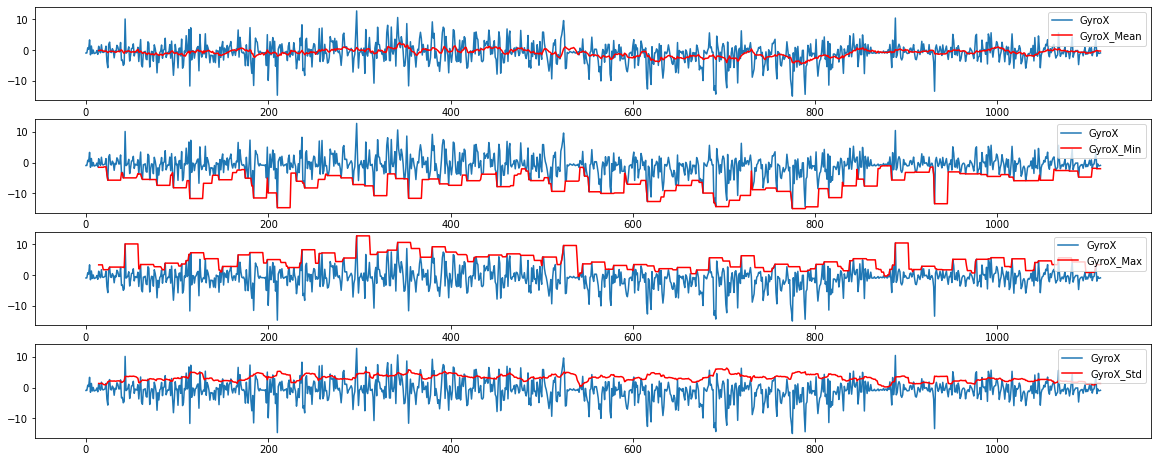

In [6]:
plotRolling('GyroX', dataset, window)

In [7]:
ndataset = createNewDataset(dataset, window)

In [8]:
#Salvando Dataset
ndataset.to_csv('./dataset-mod/db_w'+str(window)+'.csv',index=False)